In [1]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

In [2]:
# read John Hopkins data from Github
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_global = pd.read_csv(base_url + 'time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv(base_url + 'time_series_covid19_deaths_global.csv')
confirmed_us = pd.read_csv(base_url + 'time_series_covid19_confirmed_US.csv')
deaths_us = pd.read_csv(base_url + 'time_series_covid19_deaths_US.csv')

# get latest or current date from data set(s)
latest_date = confirmed_us.columns.values[-1]

# aggregate data by state (separate highest and lowest states)
us_drop_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
confirmed_us.drop(us_drop_columns, axis=1, inplace=True)
deaths_us.drop(us_drop_columns + ['Population'], axis=1, inplace=True)
confirmed_us_sorted = confirmed_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_us_sorted = deaths_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
states = confirmed_us_sorted.T.columns.values

us_confirmed = confirmed_us_sorted.T
us_deaths = deaths_us_sorted.T[states]

# aggregate data by country
global_drop_columns = ['Province/State', 'Lat', 'Long']
confirmed_global.drop(global_drop_columns, axis=1, inplace=True)
confirmed_global_sorted = confirmed_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_global.drop(global_drop_columns, axis=1, inplace=True)
deaths_global_sorted = deaths_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
countries = confirmed_global_sorted.T.columns.values

global_confirmed = confirmed_global_sorted.T
global_deaths = deaths_global_sorted.T

In [3]:
# output current results
current_confirmed_global = confirmed_global_sorted[[latest_date]]
current_confirmed_global = current_confirmed_global.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_global = deaths_global_sorted[[latest_date]]
current_deaths_global = current_deaths_global.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_global = current_confirmed_global.merge(current_deaths_global, left_index=True, right_index=True)
joined_global['percentDeaths'] = joined_global['deaths'].divide(joined_global['confirmed'], axis=0)

joined_global.head(20)

,confirmed,deaths,percentDeaths
Country/Region,,,
US,1283929,77180,0.060112
Spain,222857,26299,0.118008
Italy,217185,30201,0.139057
United Kingdom,212629,31316,0.147280
Russia,187859,1723,0.009172
France,176202,26233,0.148880
Germany,170588,7510,0.044024
Brazil,146894,10017,0.068192
Turkey,135569,3689,0.027211


In [4]:
# output current results
current_confirmed_us = confirmed_us_sorted[[latest_date]]
current_confirmed_us = current_confirmed_us.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_us = deaths_us_sorted[[latest_date]]
current_deaths_us = current_deaths_us.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_us = current_confirmed_us.merge(current_deaths_us, left_index=True, right_index=True)
joined_us['percentDeaths'] = joined_us['deaths'].divide(joined_us['confirmed'], axis=0)

joined_us.head(20)

,confirmed,deaths,percentDeaths
Province_State,,,
New York,330407,26243,0.079426
New Jersey,135840,8960,0.065960
Massachusetts,75333,4702,0.062416
Illinois,73760,3241,0.043940
California,63779,2613,0.040970
Pennsylvania,57371,3715,0.064754
Michigan,46386,4399,0.094835
Florida,39199,1669,0.042578
Texas,37246,1025,0.027520


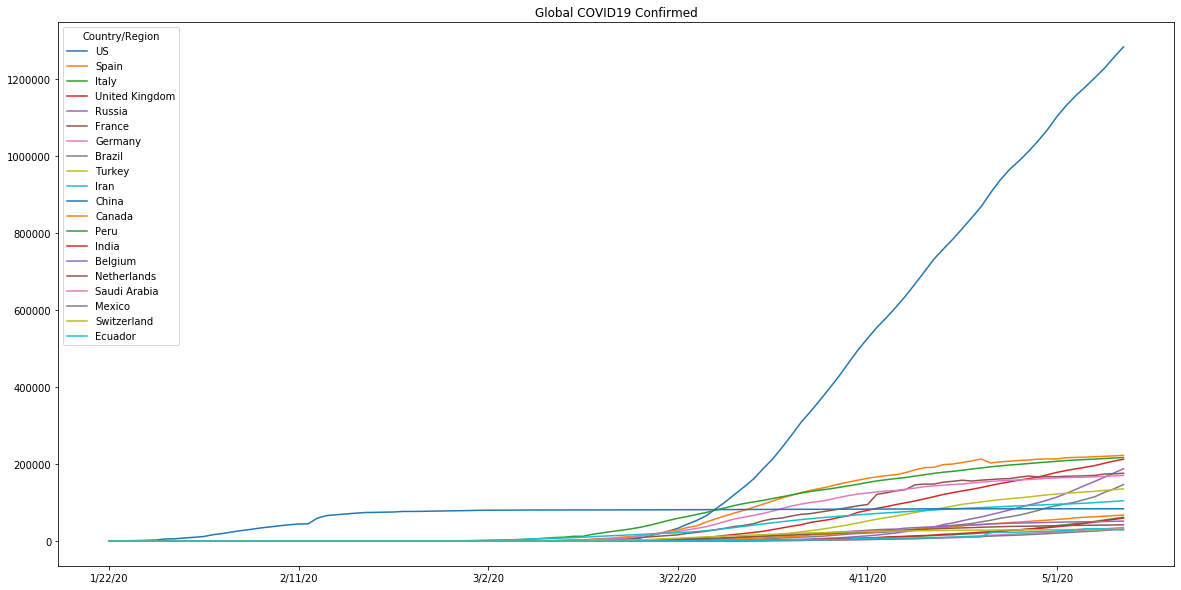

In [5]:
confirmed_global_sorted[:20].T.plot(figsize=(20,10), title="Global COVID19 Confirmed")

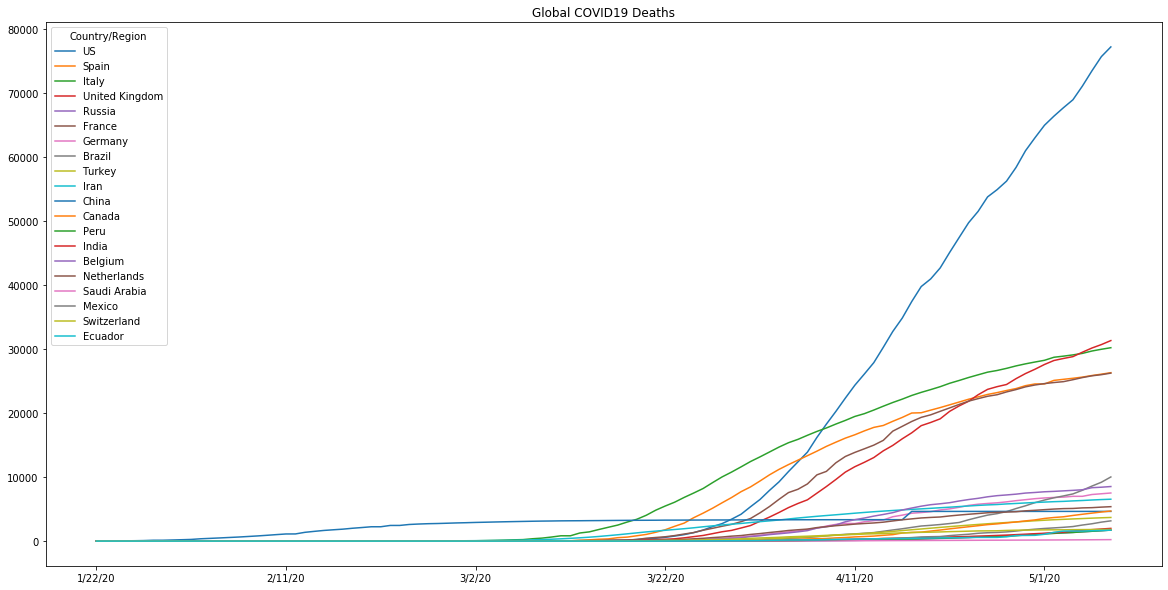

In [6]:
countries = confirmed_global_sorted.T.columns.values
deaths_global_sorted.T[countries[0:20]].plot(figsize=(20,10), title="Global COVID19 Deaths")

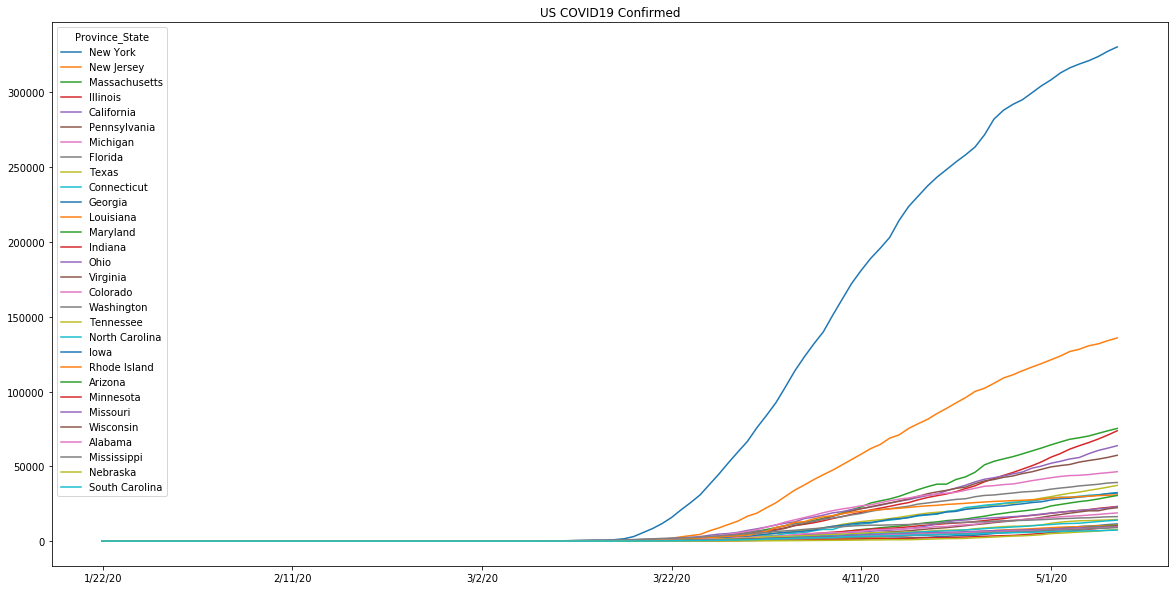

In [7]:
confirmed_us_sorted[:30].T.plot(figsize=(20,10), title="US COVID19 Confirmed")

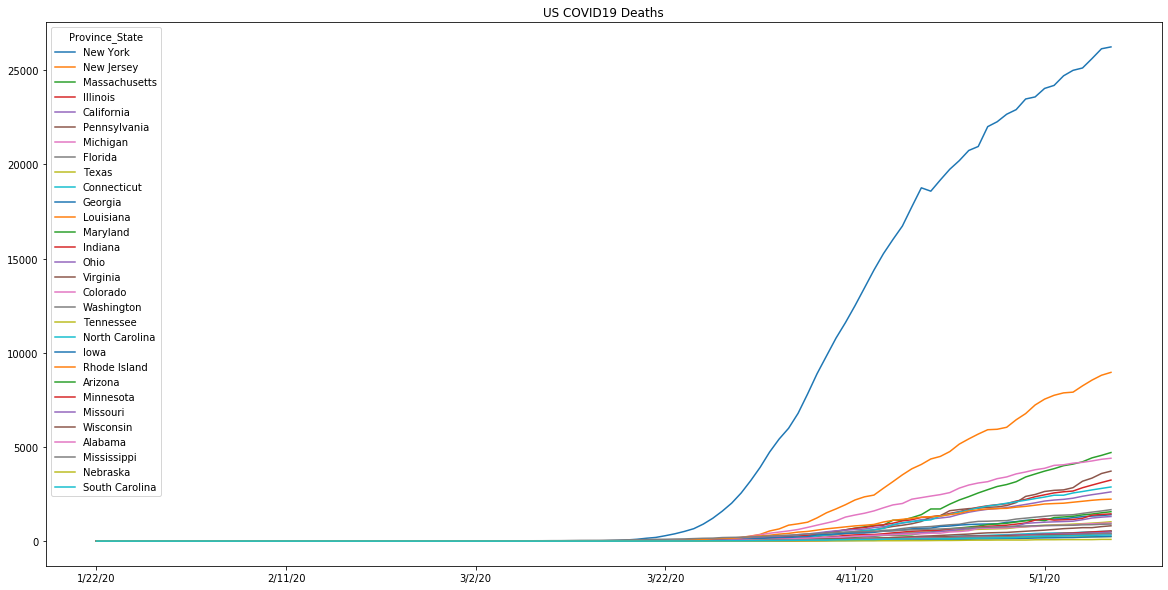

In [8]:
states = confirmed_us_sorted.T.columns.values
deaths_us_sorted.T[states[0:30]].plot(figsize=(20,10), title="US COVID19 Deaths")